# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'day_of_month' feature :
    - Aim is to treat 'day_of_month' as categorical variable rather than numerical and check how different groups will impact prediction.
- Ordinal encoding on 'education' and 'job' features :
    - Aim is to get education and job features encoded with rank rather than default encoding i.e., one-hot encoding.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [6]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
19,student,single,secondary,no,55,no,no,telephone,6,oct,89,2,193,1,other,no
19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180,2,success,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes


In [7]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,2
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,1
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes,1
19,student,single,unknown,no,108,no,no,cellular,9,mar,273,2,182,1,success,yes,1
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,1
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,1
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8930, 17)

In [12]:
# test data shape
bank_df_test.shape

(2232, 17)

In [13]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
19,student,single,unknown,no,779,no,no,cellular,1,apr,184,4,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes


In [14]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
19,student,single,secondary,no,372,no,no,telephone,8,jul,444,3,-1,0,unknown,yes
20,student,single,primary,no,6991,no,no,cellular,12,aug,178,2,-1,0,unknown,yes
20,student,married,unknown,no,292,no,no,cellular,5,aug,385,2,93,1,failure,yes
21,student,single,secondary,no,123,no,no,telephone,12,feb,379,5,93,2,success,yes
21,student,single,secondary,no,215,no,no,cellular,24,may,382,1,89,7,success,yes
21,student,single,secondary,no,2488,no,no,cellular,12,oct,180,1,-1,0,unknown,yes
21,student,single,primary,no,8278,no,no,cellular,29,oct,445,1,-1,0,unknown,yes
20,student,single,unknown,no,801,no,no,cellular,11,nov,244,2,-1,0,unknown,yes
19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180,2,success,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


In [15]:
AutoClassifier.generate_custom_config("custom_bank_marketing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  day_of_month

Enter the index of corresponding binning method for feature day_of_month:  1

Enter the number of bins for feature day_of_month:  4



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  2

Enter the feature or list of features for OrdinalEncoding:  education, job



Customization of categorical encoding has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  4



Generating custom json and exiting ...

Process of generating custom config file for AutoML has been completed successfully.

'custom_bank_marketing.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoML instance
# Excluding svm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging
# Using custom config file for custom run

aml = AutoClassifier(exclude=['svm'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     verbose=2,
                     custom_config_file='custom_bank_marketing.json')


 Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "day_of_month": {
            "Type": "Equal-Width",
            "NumOfBins": 4
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "education",
            "job"
        ]
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
balance,BIGINT,8930,0,None,635,7760,535,0.0,100.0
contact,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
duration,BIGINT,8930,0,None,0,8930,0,0.0,100.0
age,BIGINT,8930,0,None,0,8930,0,0.0,100.0
education,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
deposit,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
previous,BIGINT,8930,0,None,6621,2309,0,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0
job,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
day_of_month,BIGINT,8930,0,None,0,8930,0,0.0,100.0



Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
50%,39,554.5,16,257,2,-1,0
count,8930,8930,8930,8930,8930,8930,8930
mean,41.143,1545.517,15.701,372.748,2.511,52.214,0.834
min,18,-6847,1,2,1,-1,0
max,95,81204,31,3881,43,842,55
75%,49,1696,22,497.75,3,57.75,1
25%,32,121,8,138,1,-1,0
std,11.835,3325.863,8.434,346.478,2.667,109.232,2.204



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


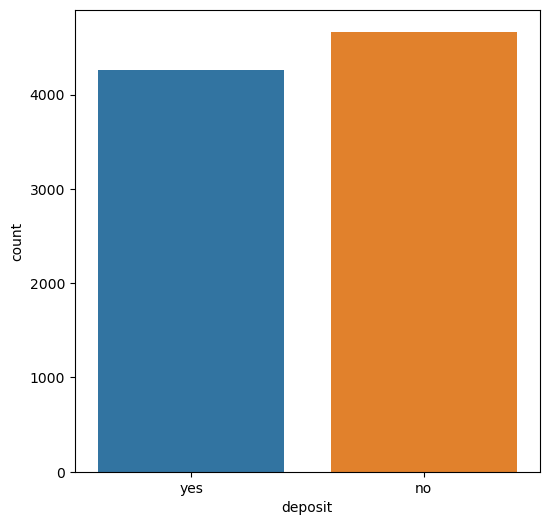

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    balance           9.406495
1   previous          11.433371
2   duration           5.688690
3      pdays          16.595745
4        age           1.399776
5   campaign           5.386338


Analysis complete. No action taken.                                                     


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171270966392409"'2
All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171270478636473"'22


duration,loan,age,deposit,housing,job,poutcome,default_value,previous,id,campaign,contact,month_of_year,marital,pdays,education,balance,day_of_month
326,no,62,1,no,technician,unknown,no,0,3778,1,cellular,feb,married,-1,secondary,973,day_of_month_1
326,yes,33,0,no,blue-collar,unknown,yes,0,5617,2,cellular,jul,single,-1,primary,-15,day_of_month_1
326,no,45,0,no,admin.,unknown,no,0,7523,2,cellular,feb,married,-1,secondary,67,day_of_month_1
326,no,33,0,no,admin.,failure,no,2,6081,3,telephone,may,single,350,secondary,-15,day_of_month_2
326,no,26,1,no,management,unknown,no,0,568,1,cellular,jun,single,-1,secondary,2613,day_of_month_1
326,no,35,1,yes,housemaid,failure,no,4,8818,5,cellular,may,married,179,tertiary,1265,day_of_month_2
326,no,79,1,no,retired,success,no,2,7303,2,telephone,jan,married,272,primary,8556,day_of_month_3
326,no,26,0,yes,services,unknown,no,0,336,2,unknown,may,divorced,-1,primary,633,day_of_month_4
326,no,44,0,no,blue-collar,unknown,no,0,10822,1,cellular,nov,married,-1,secondary,1397,day_of_month_3
326,no,27,1,no,unknown,unknown,no,0,11682,1,cellular,feb,single,-1,unknown,326,day_of_month_3


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 22% - 5/22


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171270193649150"'22


duration,age,loan,deposit,housing,poutcome,default_value,previous,id,day_of_month,campaign,contact,month_of_year,marital,pdays,balance,education,job
469,52,yes,0,no,unknown,no,0,9586,day_of_month_2,7,cellular,jul,divorced,-1,92,0,4
1060,32,no,1,yes,unknown,no,0,2303,day_of_month_3,5,unknown,jun,married,-1,607,2,4
1060,49,no,1,yes,unknown,no,0,37,day_of_month_2,2,cellular,jul,married,-1,3728,1,1
183,36,no,0,no,failure,no,11,3166,day_of_month_2,1,cellular,oct,single,91,1830,2,1
183,41,no,1,no,failure,no,2,2677,day_of_month_2,2,cellular,jun,married,294,254,2,4
183,34,no,0,no,unknown,no,0,2145,day_of_month_4,10,cellular,aug,married,-1,0,1,9
183,43,yes,1,yes,failure,no,13,2536,day_of_month_3,2,cellular,sep,married,184,0,1,10
1060,59,no,1,no,unknown,no,0,355,day_of_month_2,2,cellular,may,divorced,-1,5845,1,5
469,31,no,1,no,success,no,2,9382,day_of_month_2,1,cellular,mar,single,181,147,2,4
469,35,no,1,no,failure,no,2,8586,day_of_month_1,2,cellular,feb,married,185,62,2,4


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171270555011928"'22


['loan', 'housing', 'poutcome', 'default_value', 'day_of_month', 'contact', 'month_of_year', 'marital']


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


No information provided for performing customized train test split. Proceeding with default option.
No information provided for performing customized feature scaling. Proceeding with default option.
No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.8                                                                       
Testing size  : 0.2                                                                       


duration,age,loan_0,loan_1,deposit,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,default_value_0,default_value_1,previous,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,campaign,contact_0,contact_1,contact_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,marital_0,marital_1,marital_2,pdays,balance,education,job
559,49,1,0,1,1,0,0,0,0,1,1,0,0,21,0,1,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,408,0,1
232,40,1,0,1,0,1,0,0,1,0,1,0,2,10,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,409,3840,2,4
207,95,1,0,1,1,0,0,0,0,1,1,0,0,13,0,0,1,0,17,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1,2282,0,5
578,34,1,0,1,0,1,0,0,0,1,1,0,0,9,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1,855,1,1
205,19,1,0,1,1,0,0,0,0,1,1,0,0,35,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1,302,1,8
288,61,1,0,1,1,0,0,0,0,1,1,0,0,38,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-1,56,0,5
97,78,1,0,1,1,0,0,0,0,1,1,0,0,15,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1,229,0,5
168,19,1,0,1,1,0,0,0,1,0,1,0,2,19,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,182,108,3,8
403,76,1,0,1,1,0,0,0,1,0,1,0,1,8,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,182,4984,3,6
218,61,1,0,1,1,0,0,0,1,0,1,0,3,14,0,0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,91,1058,1,5


duration,age,loan_0,loan_1,deposit,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,default_value_0,default_value_1,previous,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,campaign,contact_0,contact_1,contact_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,marital_0,marital_1,marital_2,pdays,balance,education,job
1360,34,1,0,1,1,0,0,0,0,1,1,0,0,33,0,0,1,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1,-30,1,7
788,34,1,0,1,0,1,0,0,0,1,1,0,0,17,0,1,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1,146,2,2
315,61,1,0,1,1,0,0,0,1,0,1,0,2,118,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,182,4243,1,5
920,40,1,0,1,0,1,0,0,0,1,1,0,0,26,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,-9,0,7
746,80,1,0,1,1,0,0,1,0,0,1,0,1,60,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,86,997,0,5
1134,59,1,0,1,1,0,0,0,0,1,1,0,0,163,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,100,0,3
712,80,1,0,1,1,0,1,0,0,0,1,0,12,20,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,64,8304,1,5
952,40,1,0,1,1,0,0,0,0,1,0,1,0,146,0,0,1,0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-1,0,2,2
226,61,1,0,1,1,0,0,0,0,1,1,0,0,22,0,1,0,0,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1,5267,2,5
65,49,1,0,0,1,0,0,0,0,1,1,0,0,93,0,0,1,0,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,687,1,2


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   previous          11.433371
1    balance           9.406495
2   duration           5.688690
3      pdays          16.595745
4         id           0.761478
5   campaign           5.386338
6        age           1.399776


['age', 'id', 'duration', 'campaign']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171271396565067"'/22


['pdays', 'previous', 'balance']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171270823487989"'/22


['poutcome_3', 'month_of_year_6', 'job', 'poutcome_1', 'month_of_year_11', 'poutcome_0', 'month_of_year_9', 'poutcome_2', 'previous', 'month_of_year_2', 'month_of_year_4', 'month_of_year_7', 'campaign', 'day_of_month_1', 'month_of_year_5', 'month_of_year_8', 'day_of_month_3', 'pdays', 'month_of_year_3', 'month_of_year_1', 'month_of_year_10', 'education', 'marital_1', 'contact_0', 'age', 'default_value_0', 'day_of_month_2', 'month_of_year_0', 'housing_0', 'default_value_1', 'marital_2', 'marital_0', 'loan_1', 'day_of_month_0', 'contact_2', 'housing_1', 'contact_1', 'loan_0', 'balance']


['job', 'previous', 'campaign', 'pdays', 'education', 'age', 'balance']


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_4,month_of_year_2,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,job,previous,campaign,pdays,education,age,balance
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,7223,0,0,0,1,1,0,1,0.36363636363636365,0.0,0.4,0.0,0.6666666666666666,0.375,0.3976801988400994
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,6459,0,0,0,0,1,0,1,0.8181818181818182,0.0,0.4,0.0,0.3333333333333333,0.5178571428571429,0.5219552609776305
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,10946,0,0,0,1,1,0,1,0.6363636363636364,0.0,0.0,0.0,0.3333333333333333,0.16071428571428573,0.3716652858326429
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,3045,0,0,0,0,1,0,1,0.36363636363636365,0.0,0.6,0.0,0.3333333333333333,0.4107142857142857,0.4150787075393538
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,3221,1,1,0,0,0,0,0,0.8181818181818182,0.0,0.2,0.0,0.3333333333333333,0.4107142857142857,0.5955260977630489
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1520,0,0,1,0,1,0,1,0.9090909090909091,1.0,0.2,0.0,0.3333333333333333,0.14285714285714285,0.38674399337199666
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1914,0,0,0,0,0,0,1,0.9090909090909091,0.5,0.0,0.6267281105990783,0.6666666666666666,0.39285714285714285,0.35260977630488816
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,2353,0,0,1,0,0,0,1,0.09090909090909091,0.0,0.2,0.0,0.3333333333333333,0.2857142857142857,0.3696768848384424
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,6160,0,0,0,0,0,0,1,0.09090909090909091,0.0,0.2,0.0,0.3333333333333333,0.125,0.672079536039768
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,8586,0,0,1,0,0,0,1,0.36363636363636365,1.0,0.2,0.8571428571428571,0.6666666666666666,0.30357142857142855,0.34979287489643746


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_4,month_of_year_2,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,job,previous,campaign,pdays,education,age,balance
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,28,0,0,0,0,0,1,1,0.45454545454545453,0.0,0.0,0.0,0.0,1.1071428571428572,0.5086992543496272
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,60,0,0,0,0,0,0,1,0.45454545454545453,0.5,0.2,0.4009216589861751,0.0,1.1071428571428572,0.5047224523612261
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,17,0,0,0,0,1,0,1,0.18181818181818182,0.0,0.2,0.0,0.6666666666666666,0.2857142857142857,0.3637116818558409
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,22,0,0,0,0,0,0,1,0.45454545454545453,0.0,0.4,0.0,0.6666666666666666,0.7678571428571429,1.2122618061309032
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,103,0,0,0,0,0,0,1,0.6363636363636364,0.0,0.2,0.0,0.3333333333333333,0.25,1.0011599005799503
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,119,0,1,0,0,1,0,0,0.36363636363636365,0.0,0.4,0.0,0.3333333333333333,0.25,0.3617232808616404
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,20,0,0,0,0,0,1,1,0.45454545454545453,6.0,0.0,0.2995391705069124,0.3333333333333333,1.1071428571428572,1.7154929577464788
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,31,1,0,1,0,0,0,1,0.45454545454545453,0.0,0.0,0.0,0.0,1.0714285714285714,0.5696768848384424
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,33,0,0,0,0,0,0,1,0.6363636363636364,0.0,0.4,0.0,0.3333333333333333,0.2857142857142857,0.33454846727423365
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,26,0,0,0,1,1,0,1,0.6363636363636364,0.0,0.2,0.0,0.0,0.39285714285714285,0.3380281690140845


['age', 'loan_0', 'loan_1', 'housing_0', 'housing_1', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3', 'default_value_0', 'previous', 'day_of_month_0', 'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'campaign', 'contact_0', 'contact_1', 'contact_2', 'month_of_year_0', 'month_of_year_1', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'marital_0', 'marital_1', 'marital_2', 'pdays', 'balance', 'education', 'job']


['r_age', 'r_previous', 'r_campaign', 'r_pdays', 'r_balance', 'r_education', 'r_job']


r_month_of_year_8,r_housing_0,deposit,r_month_of_year_1,r_marital_1,r_poutcome_0,r_day_of_month_3,r_default_value_0,r_month_of_year_10,r_day_of_month_0,r_month_of_year_5,r_contact_1,r_month_of_year_9,r_month_of_year_11,r_contact_2,r_marital_2,r_day_of_month_1,id,r_poutcome_3,r_month_of_year_4,r_month_of_year_3,r_month_of_year_6,r_month_of_year_7,r_poutcome_1,r_marital_0,r_poutcome_2,r_contact_0,r_loan_0,r_month_of_year_0,r_loan_1,r_housing_1,r_day_of_month_2,r_age,r_previous,r_campaign,r_pdays,r_balance,r_education,r_job
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,7223,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0.375,0.0,0.4,0.0,0.3976801988400994,0.6666666666666666,0.36363636363636365
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,6459,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0.5178571428571429,0.0,0.4,0.0,0.5219552609776305,0.3333333333333333,0.8181818181818182
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,10946,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.16071428571428573,0.0,0.0,0.0,0.3716652858326429,0.3333333333333333,0.6363636363636364
0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3045,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0.4107142857142857,0.0,0.6,0.0,0.4150787075393538,0.3333333333333333,0.36363636363636365
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,3221,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0.4107142857142857,0.0,0.2,0.0,0.5955260977630489,0.3333333333333333,0.8181818181818182
1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1520,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.14285714285714285,1.0,0.2,0.0,0.38674399337199666,0.3333333333333333,0.9090909090909091
0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1914,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0.39285714285714285,0.5,0.0,0.6267281105990783,0.35260977630488816,0.6666666666666666,0.9090909090909091
0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,2353,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0.2857142857142857,0.0,0.2,0.0,0.3696768848384424,0.3333333333333333,0.09090909090909091
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6160,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0.125,0.0,0.2,0.0,0.672079536039768,0.3333333333333333,0.09090909090909091
0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,8586,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0.30357142857142855,1.0,0.2,0.8571428571428571,0.34979287489643746,0.6666666666666666,0.36363636363636365


r_month_of_year_8,r_housing_0,deposit,r_month_of_year_1,r_marital_1,r_poutcome_0,r_day_of_month_3,r_default_value_0,r_month_of_year_10,r_day_of_month_0,r_month_of_year_5,r_contact_1,r_month_of_year_9,r_month_of_year_11,r_contact_2,r_marital_2,r_day_of_month_1,id,r_poutcome_3,r_month_of_year_4,r_month_of_year_3,r_month_of_year_6,r_month_of_year_7,r_poutcome_1,r_marital_0,r_poutcome_2,r_contact_0,r_loan_0,r_month_of_year_0,r_loan_1,r_housing_1,r_day_of_month_2,r_age,r_previous,r_campaign,r_pdays,r_balance,r_education,r_job
0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,28,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1.1071428571428572,0.0,0.0,0.0,0.5086992543496272,0.0,0.45454545454545453
0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,60,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1.1071428571428572,0.5,0.2,0.4009216589861751,0.5047224523612261,0.0,0.45454545454545453
0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,17,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0.2857142857142857,0.0,0.2,0.0,0.3637116818558409,0.6666666666666666,0.18181818181818182
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,22,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0.7678571428571429,0.0,0.4,0.0,1.2122618061309032,0.6666666666666666,0.45454545454545453
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,103,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0.25,0.0,0.2,0.0,1.0011599005799503,0.3333333333333333,0.6363636363636364
1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,119,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0.25,0.0,0.4,0.0,0.3617232808616404,0.3333333333333333,0.36363636363636365
0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,20,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.1071428571428572,6.0,0.0,0.2995391705069124,1.7154929577464788,0.3333333333333333,0.45454545454545453
0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,31,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1.0714285714285714,0.0,0.0,0.0,0.5696768848384424,0.0,0.45454545454545453
0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,33,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0.2857142857142857,0.0,0.4,0.0,0.33454846727423365,0.3333333333333333,0.6363636363636364
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,26,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.39285714285714285,0.0,0.2,0.0,0.3380281690140845,0.0,0.6363636363636364


['duration', 'age', 'previous', 'campaign', 'pdays', 'balance', 'education', 'job']


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_2,month_of_year_4,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,duration,age,previous,campaign,pdays,balance,education,job
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,8586,0,0,1,0,0,0,1,0.45077220077220076,0.30357142857142855,1.0,0.2,0.8571428571428571,0.34979287489643746,0.6666666666666666,0.36363636363636365
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,7223,0,0,0,1,1,0,1,0.9623552123552124,0.375,0.0,0.4,0.0,0.3976801988400994,0.6666666666666666,0.36363636363636365
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,11262,1,0,1,1,1,0,1,0.03667953667953668,0.4642857142857143,0.0,0.2,0.0,0.9910521955260978,0.6666666666666666,0.36363636363636365
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,10946,0,0,0,1,1,0,1,0.3127413127413127,0.16071428571428573,0.0,0.0,0.0,0.3716652858326429,0.3333333333333333,0.6363636363636364
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,3045,0,0,0,0,1,0,1,0.7065637065637066,0.4107142857142857,0.0,0.6,0.0,0.4150787075393538,0.3333333333333333,0.36363636363636365
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,507,0,1,0,1,0,0,0,0.05694980694980695,0.7321428571428571,0.0,0.6,0.0,0.5675227837613919,0.3333333333333333,0.09090909090909091
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,6160,0,0,0,0,0,0,1,0.25386100386100385,0.125,0.0,0.2,0.0,0.672079536039768,0.3333333333333333,0.09090909090909091
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1520,0,0,1,0,1,0,1,0.25386100386100385,0.14285714285714285,1.0,0.2,0.0,0.38674399337199666,0.3333333333333333,0.9090909090909091
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,6459,0,0,0,0,1,0,1,0.9218146718146718,0.5178571428571429,0.0,0.4,0.0,0.5219552609776305,0.3333333333333333,0.8181818181818182
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,9998,0,0,0,0,1,0,1,0.9218146718146718,0.23214285714285715,1.0,0.0,0.8525345622119815,0.4291632145816073,0.3333333333333333,0.36363636363636365


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_2,month_of_year_4,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,duration,age,previous,campaign,pdays,balance,education,job
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,17,0,0,0,0,1,0,1,0.7586872586872587,0.2857142857142857,0.0,0.2,0.0,0.3637116818558409,0.6666666666666666,0.18181818181818182
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,31,1,0,1,0,0,0,1,0.32142857142857145,1.0714285714285714,0.0,0.0,0.0,0.5696768848384424,0.0,0.45454545454545453
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,91,0,0,0,0,0,0,1,0.1611969111969112,0.017857142857142856,1.0,0.0,0.880184331797235,0.3940347970173985,0.3333333333333333,0.7272727272727273
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,26,0,0,0,1,1,0,1,0.8861003861003861,0.39285714285714285,0.0,0.2,0.0,0.3380281690140845,0.0,0.6363636363636364
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,22,0,0,0,0,0,0,1,0.21621621621621623,0.7678571428571429,0.0,0.4,0.0,1.2122618061309032,0.6666666666666666,0.45454545454545453
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,93,0,0,0,0,0,0,1,0.060810810810810814,0.5535714285714286,0.0,1.0,0.0,0.45335542667771334,0.3333333333333333,0.18181818181818182
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,20,0,0,0,0,0,1,1,0.6853281853281853,1.1071428571428572,6.0,0.0,0.2995391705069124,1.7154929577464788,0.3333333333333333,0.45454545454545453
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,146,0,0,0,1,0,0,1,0.916988416988417,0.39285714285714285,0.0,0.6,0.0,0.3395194697597349,0.6666666666666666,0.18181818181818182
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,28,0,0,0,0,0,1,1,0.033783783783783786,1.1071428571428572,0.0,0.0,0.0,0.5086992543496272,0.0,0.45454545454545453
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,152,0,1,1,0,1,0,0,0.14189189189189189,0.14285714285714285,0.5,0.0,1.6175115207373272,0.340016570008285,0.6666666666666666,0.36363636363636365


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23']


                                                                                          
Skipping customized hyperparameter tuning


response_column : deposit                                                                                                                             
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
Total number of models for xgboost : 10240
-----------------------------------------------------------------------------------------------

DECISIONFOREST_4                                                                                                                                                                                        
DECISIONFOREST_5                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


GLM_0                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


KNN_17                                                                                                                                                                                                  


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.803471,0.803471,0.803471,0.803471,0.804923,0.805011,0.803471,0.806492,0.803471,0.803486
1,2,decision_forest,pca,0.772116,0.772116,0.772116,0.772116,0.772142,0.772689,0.772008,0.773159,0.772116,0.772231
2,3,knn,pca,0.750840,0.750840,0.750840,0.750840,0.752655,0.748203,0.748695,0.752074,0.750840,0.749735
3,4,glm,pca,0.722844,0.722844,0.722844,0.722844,0.722335,0.722513,0.722406,0.722992,0.722844,0.722900
4,5,decision_forest,rfe,0.666293,0.666293,0.666293,0.666293,0.674378,0.660144,0.656737,0.673125,0.666293,0.659302
5,6,xgboost,rfe,0.622060,0.622060,0.622060,0.622060,0.630563,0.614340,0.606331,0.629490,0.622060,0.609856
6,7,glm,rfe,0.618701,0.618701,0.618701,0.618701,0.640121,0.626102,0.611388,0.643127,0.618701,0.609000
7,8,glm,lasso,0.594625,0.594625,0.594625,0.594625,0.593354,0.591498,0.590830,0.593739,0.594625,0.592595
8,9,xgboost,lasso,0.522396,0.522396,0.522396,0.522396,0.261198,0.500000,0.343141,0.272898,0.522396,0.358511


In [18]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.803471,0.803471,0.803471,0.803471,0.804923,0.805011,0.803471,0.806492,0.803471,0.803486
1,2,decision_forest,pca,0.772116,0.772116,0.772116,0.772116,0.772142,0.772689,0.772008,0.773159,0.772116,0.772231
2,3,knn,pca,0.750840,0.750840,0.750840,0.750840,0.752655,0.748203,0.748695,0.752074,0.750840,0.749735
3,4,glm,pca,0.722844,0.722844,0.722844,0.722844,0.722335,0.722513,0.722406,0.722992,0.722844,0.722900
4,5,decision_forest,rfe,0.666293,0.666293,0.666293,0.666293,0.674378,0.660144,0.656737,0.673125,0.666293,0.659302
5,6,xgboost,rfe,0.622060,0.622060,0.622060,0.622060,0.630563,0.614340,0.606331,0.629490,0.622060,0.609856
6,7,glm,rfe,0.618701,0.618701,0.618701,0.618701,0.640121,0.626102,0.611388,0.643127,0.618701,0.609000
7,8,glm,lasso,0.594625,0.594625,0.594625,0.594625,0.593354,0.591498,0.590830,0.593739,0.594625,0.592595
8,9,xgboost,lasso,0.522396,0.522396,0.522396,0.522396,0.261198,0.500000,0.343141,0.272898,0.522396,0.358511


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.803471,0.803471,0.803471,0.803471,0.804923,0.805011,0.803471,0.806492,0.803471,0.803486


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [21]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

decision_forest pca
Target Column Mapping:
yes: 1
no: 0

 Prediction : 
    id  prediction    prob  deposit
0   28           0  0.6250        0
1   60           1  0.8125        1
2   17           1  0.8750        1
3   22           1  0.8125        1
4  103           0  0.7500        1
5  119           1  0.5625        1
6   20           1  0.8750        1
7   31           0  0.5625        1
8   33           1  1.0000        1
9   26           0  0.5625        1

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1      709      183   0.794843  0.759914  0.776986      933
1               1  CLASS_2      224      670   0.749441  0.785463  0.767029      853

 ROC-AUC : 


AUC,GINI
0.6783994199904756,0.3567988399809512


threshold_value,tpr,fpr
0.04081632653061224,0.7854630715123095,0.24008574490889603
0.08163265306122448,0.7854630715123095,0.24008574490889603
0.1020408163265306,0.7854630715123095,0.24008574490889603
0.12244897959183673,0.7854630715123095,0.24008574490889603
0.16326530612244897,0.7854630715123095,0.24008574490889603
0.18367346938775508,0.7854630715123095,0.24008574490889603
0.14285714285714285,0.7854630715123095,0.24008574490889603
0.061224489795918366,0.7854630715123095,0.24008574490889603
0.02040816326530612,0.7854630715123095,0.24008574490889603
0.0,1.0,1.0



 Confusion Matrix : 


array([[709, 224],
       [183, 670]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,deposit
22,1,0.8125,1
28,0,0.625,0
31,0,0.5625,1
33,1,1.0,1
91,1,0.625,1
93,0,0.8125,0
60,1,0.8125,1
26,0,0.5625,1
20,1,0.875,1
17,1,0.875,1


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171272595909978"'

Updated dataset after performing target column transformation :


duration,loan,age,housing,job,poutcome,default_value,previous,id,campaign,day_of_month,contact,month_of_year,marital,pdays,education,balance,deposit
265,no,52,yes,services,unknown,no,0,2418,5,15,telephone,jul,married,-1,secondary,497,0
305,no,34,yes,management,unknown,no,0,489,2,27,unknown,may,married,-1,secondary,-311,0
305,no,35,no,management,success,no,1,1986,2,1,cellular,oct,married,121,tertiary,611,1
1407,no,30,no,blue-collar,unknown,no,0,1275,1,23,cellular,jun,single,-1,secondary,315,1
469,no,34,yes,management,unknown,no,0,481,1,13,cellular,may,married,-1,tertiary,3050,1
469,no,45,yes,management,failure,no,1,1963,2,5,cellular,may,married,342,tertiary,0,0
835,no,45,yes,technician,unknown,no,0,2083,3,19,unknown,jun,married,-1,tertiary,377,1
162,no,28,yes,blue-collar,unknown,no,0,1078,1,12,unknown,may,single,-1,secondary,-284,0
734,no,39,yes,management,unknown,no,0,1471,2,13,cellular,may,married,-1,tertiary,297,1
61,no,63,no,retired,unknown,no,0,1653,6,6,cellular,apr,married,-1,secondary,2030,0


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171271522520562"'

Updated dataset after performing customized equal width bin-code transformation :


duration,age,loan,deposit,housing,job,poutcome,default_value,previous,id,campaign,contact,month_of_year,marital,pdays,education,balance,day_of_month
162,50,yes,0,yes,blue-collar,unknown,no,0,909,1,cellular,apr,divorced,-1,secondary,881,day_of_month_3
162,54,no,0,yes,blue-collar,unknown,no,0,1718,1,cellular,may,married,-1,primary,6242,day_of_month_1
162,38,no,1,yes,blue-collar,success,no,5,124,1,telephone,apr,divorced,181,secondary,0,day_of_month_3
427,35,no,1,no,blue-collar,success,no,3,2114,1,cellular,mar,married,181,secondary,262,day_of_month_2
223,59,yes,0,yes,retired,unknown,no,0,291,1,cellular,aug,married,-1,secondary,1035,day_of_month_1
692,33,no,1,no,services,unknown,no,0,1505,2,cellular,jan,single,-1,tertiary,-452,day_of_month_4
427,29,no,1,yes,self-employed,unknown,no,0,1308,1,cellular,may,single,-1,tertiary,476,day_of_month_3
162,59,no,1,no,management,unknown,no,0,227,2,cellular,nov,married,-1,secondary,4412,day_of_month_1
162,28,no,0,yes,blue-collar,unknown,no,0,1078,1,unknown,may,single,-1,secondary,-284,day_of_month_2
835,45,no,1,yes,technician,unknown,no,0,2083,3,unknown,jun,married,-1,tertiary,377,day_of_month_3


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171279379293492"'

Updated dataset after performing customized categorical encoding :


duration,loan,age,deposit,housing,poutcome,default_value,previous,id,day_of_month,campaign,contact,month_of_year,marital,pdays,balance,education,job
896,no,24,1,yes,unknown,no,0,1231,day_of_month_4,3,unknown,may,married,-1,685,1,1
896,no,71,1,no,unknown,no,0,885,day_of_month_1,2,cellular,jul,married,-1,4388,2,5
1161,no,31,1,no,success,no,2,2462,day_of_month_1,1,cellular,jun,single,97,617,2,4
957,no,46,1,no,success,no,1,1892,day_of_month_2,1,cellular,jul,married,182,5021,1,0
80,no,44,0,yes,failure,no,15,2742,day_of_month_1,7,cellular,feb,married,80,1451,2,4
345,no,67,1,no,unknown,no,0,1637,day_of_month_1,2,cellular,aug,married,-1,405,2,4
1426,yes,30,1,yes,unknown,no,0,891,day_of_month_2,3,cellular,jul,single,-1,155,1,1
896,no,62,1,no,success,no,2,914,day_of_month_2,1,cellular,oct,married,57,1495,1,5
1529,no,44,0,yes,unknown,no,0,2918,day_of_month_1,2,unknown,may,married,-1,105,2,4
1407,no,30,1,no,unknown,no,0,1275,day_of_month_3,1,cellular,jun,single,-1,315,1,1


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171271684004844"'

Updated dataset after performing categorical encoding :


duration,loan_0,loan_1,age,deposit,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,default_value_0,default_value_1,previous,id,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,campaign,contact_0,contact_1,contact_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,marital_0,marital_1,marital_2,pdays,balance,education,job
183,1,0,47,0,0,1,0,0,0,1,1,0,0,1883,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,298,1,0
917,1,0,52,1,1,0,0,0,0,1,1,0,0,2586,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,6657,2,6
774,0,1,37,0,0,1,0,0,0,1,1,0,0,1274,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,5432,2,4
774,1,0,47,1,0,1,1,0,0,0,1,0,1,1595,0,0,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,164,2749,0,1
366,0,1,47,0,0,1,0,0,0,1,1,0,0,1803,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,-337,1,1
366,1,0,30,0,0,1,0,0,0,1,1,0,0,1027,0,1,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1,35,0,1
774,1,0,29,1,0,1,0,0,0,1,1,0,0,1340,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,306,1,0
183,1,0,36,0,0,1,0,0,0,1,1,0,0,342,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,206,1,0
469,1,0,45,0,0,1,1,0,0,0,1,0,1,1963,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,342,0,2,4
469,1,0,34,1,0,1,0,0,0,1,1,0,0,481,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,3050,2,4


Performing transformation carried out in data preparation phase ...

Updated dataset after performing Lasso feature selection:


id,poutcome_3,month_of_year_6,job,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,previous,month_of_year_2,month_of_year_4,month_of_year_7,campaign,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,pdays,month_of_year_3,month_of_year_1,month_of_year_10,education,marital_1,contact_0,age,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,balance,deposit
1231,1,0,1,0,0,0,0,0,0,0,0,0,3,0,0,1,1,-1,0,0,0,1,1,0,24,1,0,0,0,0,0,0,0,0,1,1,0,1,685,1
885,1,0,5,0,0,0,0,0,0,0,0,0,2,0,1,0,0,-1,0,0,0,2,1,1,71,1,0,0,1,0,0,0,0,1,0,0,0,1,4388,1
2462,0,1,4,0,0,0,0,1,2,0,0,0,1,0,0,0,0,97,0,0,0,2,0,1,31,1,0,0,1,0,1,0,0,1,0,0,0,1,617,1
1892,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,182,0,0,0,1,1,1,46,1,0,0,1,0,0,0,0,0,0,0,0,1,5021,1
2742,0,0,4,0,0,1,0,0,15,0,0,0,7,0,0,0,0,80,1,0,0,2,1,1,44,1,0,0,0,0,0,0,0,1,0,1,0,1,1451,0
936,1,0,5,0,0,0,0,0,0,0,1,0,1,0,0,0,1,-1,0,0,0,1,1,0,60,1,0,0,1,0,0,0,0,0,0,0,1,1,143,0
891,1,0,1,0,0,0,0,0,0,0,0,0,3,1,1,0,0,-1,0,0,0,1,0,1,30,1,0,0,0,0,1,0,1,0,0,1,0,0,155,1
914,0,0,5,0,0,0,0,1,2,0,0,0,1,1,0,0,0,57,0,0,1,1,1,1,62,1,0,0,1,0,0,0,0,0,0,0,0,1,1495,1
2918,1,0,4,0,0,0,0,0,0,0,0,0,2,0,0,1,0,-1,0,0,0,2,1,0,44,1,0,0,0,0,0,0,0,1,1,1,0,1,105,0
1275,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,0,0,0,1,0,1,30,1,1,0,1,0,1,0,0,0,0,0,0,1,315,1



Updated dataset after performing scaling on Lasso selected features :


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_4,month_of_year_2,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,job,previous,campaign,pdays,education,age,balance
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,2083,0,0,0,1,1,0,1,0.8181818181818182,0.0,0.4,0.0,0.6666666666666666,0.48214285714285715,0.4019884009942005
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1137,0,0,0,0,1,1,1,0.09090909090909091,0.0,0.4,0.0,0.3333333333333333,0.26785714285714285,0.3395194697597349
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,3414,0,0,0,0,0,0,1,0.36363636363636365,0.0,0.2,0.0,0.3333333333333333,0.42857142857142855,0.508202154101077
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1208,0,0,0,0,0,1,1,0.8181818181818182,0.0,0.4,0.0,0.6666666666666666,0.6785714285714286,0.584092792046396
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1471,0,0,0,0,1,0,1,0.36363636363636365,0.0,0.2,0.0,0.6666666666666666,0.375,0.38873239436619716
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1653,0,0,1,0,0,0,1,0.45454545454545453,0.0,1.0,0.0,0.3333333333333333,0.8035714285714286,0.675890637945319
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1275,0,0,0,0,0,0,1,0.09090909090909091,0.0,0.0,0.0,0.3333333333333333,0.21428571428571427,0.3917149958574979
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,2918,0,0,1,1,1,0,1,0.36363636363636365,0.0,0.2,0.0,0.6666666666666666,0.4642857142857143,0.3569179784589892
1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1435,0,0,0,0,0,0,1,0.45454545454545453,0.0,0.0,0.0,0.3333333333333333,0.9285714285714286,1.403645401822701
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1087,0,0,0,0,0,0,1,0.36363636363636365,2.5,0.0,0.42857142857142855,0.6666666666666666,0.5892857142857143,0.3968516984258492



Updated dataset after performing RFE feature selection:


id,age,loan_0,loan_1,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,default_value_0,previous,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,campaign,contact_0,contact_1,contact_2,month_of_year_0,month_of_year_1,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,marital_0,marital_1,marital_2,pdays,balance,education,job,deposit
1866,35,1,0,0,1,1,0,0,0,1,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,290,0,0,1,0
1192,56,1,0,1,0,0,0,0,1,1,0,0,0,1,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1,94,2,4,0
972,72,1,0,1,0,0,0,0,1,1,0,1,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1,1612,0,5,1
1094,28,1,0,0,1,0,0,0,1,1,0,0,0,0,1,23,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1,222,1,7,0
2786,27,1,0,1,0,0,0,0,1,1,0,1,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1,795,1,7,0
2646,31,0,1,0,1,0,0,0,1,1,0,0,0,0,1,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-1,-547,2,4,0
1106,37,1,0,1,0,0,0,0,1,1,0,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,-1,2951,2,4,0
521,34,1,0,0,1,0,0,1,0,1,3,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,184,294,1,9,1
1552,25,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,303,1,1,1
2418,52,1,0,0,1,0,0,0,1,1,0,0,1,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-1,497,1,7,0



Updated dataset after performing scaling on RFE selected features :


r_month_of_year_8,deposit,r_housing_0,r_month_of_year_1,r_marital_1,r_poutcome_0,r_day_of_month_3,r_default_value_0,r_month_of_year_10,r_day_of_month_0,r_month_of_year_5,r_contact_1,r_month_of_year_9,r_month_of_year_11,r_contact_2,r_marital_2,r_day_of_month_1,id,r_month_of_year_4,r_month_of_year_6,r_month_of_year_3,r_poutcome_3,r_month_of_year_7,r_poutcome_1,r_marital_0,r_poutcome_2,r_contact_0,r_loan_0,r_month_of_year_0,r_loan_1,r_housing_1,r_day_of_month_2,r_age,r_previous,r_campaign,r_pdays,r_balance,r_education,r_job
0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,2418,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.6071428571428571,0.0,0.8,0.0,0.4218724109362055,0.3333333333333333,0.6363636363636364
0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2083,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0.48214285714285715,0.0,0.4,0.0,0.4019884009942005,0.6666666666666666,0.8181818181818182
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1078,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.17857142857142858,0.0,0.0,0.0,0.29246064623032314,0.3333333333333333,0.09090909090909091
0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1137,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.26785714285714285,0.0,0.4,0.0,0.3395194697597349,0.3333333333333333,0.09090909090909091
0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1208,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.6785714285714286,0.0,0.4,0.0,0.584092792046396,0.6666666666666666,0.8181818181818182
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,3206,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0.42857142857142855,0.0,0.2,0.0,0.9136702568351284,0.3333333333333333,0.6363636363636364
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1471,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0.375,0.0,0.2,0.0,0.38873239436619716,0.6666666666666666,0.36363636363636365
0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1653,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0.8035714285714286,0.0,1.0,0.0,0.675890637945319,0.3333333333333333,0.45454545454545453
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1435,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0.9285714285714286,0.0,0.0,0.0,1.403645401822701,0.3333333333333333,0.45454545454545453
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1087,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0.5892857142857143,2.5,0.0,0.42857142857142855,0.3968516984258492,0.6666666666666666,0.36363636363636365



Updated dataset after performing scaling for PCA feature selection :


deposit,poutcome_3,month_of_year_6,poutcome_1,month_of_year_11,poutcome_0,month_of_year_9,poutcome_2,month_of_year_2,month_of_year_4,month_of_year_7,day_of_month_1,month_of_year_5,month_of_year_8,day_of_month_3,month_of_year_3,month_of_year_1,month_of_year_10,marital_1,contact_0,default_value_0,day_of_month_2,month_of_year_0,housing_0,default_value_1,marital_2,id,marital_0,loan_1,day_of_month_0,contact_2,housing_1,contact_1,loan_0,duration,age,previous,campaign,pdays,balance,education,job
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1208,0,0,0,0,0,1,1,0.03667953667953668,0.6785714285714286,0.0,0.4,0.0,0.584092792046396,0.6666666666666666,0.8181818181818182
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,2083,0,0,0,1,1,0,1,0.8040540540540541,0.48214285714285715,0.0,0.4,0.0,0.4019884009942005,0.6666666666666666,0.8181818181818182
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1078,0,0,0,1,1,0,1,0.15444015444015444,0.17857142857142858,0.0,0.0,0.0,0.29246064623032314,0.3333333333333333,0.09090909090909091
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1471,0,0,0,0,1,0,1,0.7065637065637066,0.375,0.0,0.2,0.0,0.38873239436619716,0.6666666666666666,0.36363636363636365
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1275,0,0,0,0,0,0,1,1.356177606177606,0.21428571428571427,0.0,0.0,0.0,0.3917149958574979,0.3333333333333333,0.09090909090909091
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,2918,0,0,1,1,1,0,1,1.473938223938224,0.4642857142857143,0.0,0.2,0.0,0.3569179784589892,0.6666666666666666,0.36363636363636365
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,481,0,0,0,0,1,0,1,0.45077220077220076,0.2857142857142857,0.0,0.0,0.0,0.8449047224523613,0.6666666666666666,0.36363636363636365
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1963,0,0,1,0,1,0,1,0.45077220077220076,0.48214285714285715,0.5,0.2,1.5806451612903225,0.3395194697597349,0.6666666666666666,0.36363636363636365
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1137,0,0,0,0,1,1,1,0.2924710424710425,0.26785714285714285,0.0,0.4,0.0,0.3395194697597349,0.3333333333333333,0.09090909090909091
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,3414,0,0,0,0,0,0,1,0.2924710424710425,0.42857142857142855,0.0,0.2,0.0,0.508202154101077,0.3333333333333333,0.36363636363636365



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,deposit
0,481,0.840423,-0.078202,0.519314,-0.235976,-0.630453,0.400092,-0.356122,-0.557473,-0.236443,...,0.006395,-0.020061,0.101575,0.061545,0.247413,0.348684,0.123761,0.073964,-0.082099,1
1,2418,0.786491,-0.546661,0.206270,-0.166221,-0.643033,0.383979,-0.234491,-0.236454,0.204419,...,0.295996,0.181241,0.271679,-0.314340,0.046060,0.118665,-0.087452,0.043704,0.005034,0
2,1208,-0.365531,-0.991699,-0.473688,-0.143153,-0.163626,0.127774,1.012675,-0.094589,0.092953,...,0.257070,0.006114,0.167476,-0.044885,0.234741,0.223589,-0.209126,0.067296,-0.200656,0
3,1435,-0.604753,-0.723262,0.105834,-0.352515,-0.662278,0.240151,-0.413919,-0.268817,-0.065171,...,-0.054376,-0.032154,-0.082263,0.109986,-0.025591,0.207752,-0.250483,-0.145602,0.347224,1
4,1275,-0.724556,0.356190,-0.834477,0.665981,-0.055528,-0.564244,-0.362970,0.096545,-0.149603,...,-0.160275,0.020299,0.231042,-0.167936,-0.310487,0.663122,0.881137,0.215762,-0.175914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1479,0.472085,0.436086,1.507823,-0.778498,-0.558631,-0.091140,0.007241,-0.007943,-0.111745,...,0.061249,0.919887,1.056387,0.028009,0.113938,-0.445449,0.545797,0.231628,0.348132,1
2228,1070,1.287746,0.630783,-0.906758,0.400904,-0.194087,-0.768591,0.014612,0.083413,-0.272752,...,0.247865,0.771116,0.244228,-0.771264,0.105659,-0.588037,-0.265916,-0.119427,0.329139,0
2229,1495,0.848879,-0.143379,0.368545,-0.138536,0.708529,0.359280,-0.234635,-0.677309,-0.163294,...,-0.100206,0.027750,0.307775,-0.297498,-0.039479,0.150045,0.414251,0.074171,0.062443,1
2230,1125,0.070449,-1.159277,-0.758007,0.012798,-0.020229,-1.102379,-0.114486,0.452093,-0.014456,...,0.161363,0.261296,-0.031534,-0.175881,-0.399199,0.047380,-0.342448,0.000421,-0.029222,0


Data Transformation completed.
xgboost pca
Target Column Mapping:
yes: 1
no: 0

 Prediction : 
     id  Prediction  Confidence_Lower  Confidence_upper  deposit
0  1208           0            0.9375            0.9375        0
1  1275           1            0.9375            0.9375        1
2  1137           0            0.8750            0.8750        0
3  1471           1            1.0000            1.0000        1
4  1963           1            0.8125            0.8125        0
5  1552           0            0.5625            0.5625        1
6  2083           1            0.7500            0.7500        1
7  1435           1            0.8750            0.8750        1
8  2418           0            1.0000            1.0000        0
9   481           1            0.7500            0.7500        1

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                          

AUC,GINI
0.7408506525203741,0.48170130504074815


threshold_value,tpr,fpr
0.04081632653061224,0.8460038986354775,0.19734660033167495
0.08163265306122448,0.8460038986354775,0.19734660033167495
0.1020408163265306,0.8460038986354775,0.19734660033167495
0.12244897959183673,0.8460038986354775,0.19734660033167495
0.16326530612244897,0.8460038986354775,0.19734660033167495
0.18367346938775508,0.8460038986354775,0.19734660033167495
0.14285714285714285,0.8460038986354775,0.19734660033167495
0.061224489795918366,0.8460038986354775,0.19734660033167495
0.02040816326530612,0.8460038986354775,0.19734660033167495
0.0,1.0,1.0



 Confusion Matrix : 


array([[968, 238],
       [158, 868]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,deposit
10,0,1.0,1.0,0
12,1,0.9375,0.9375,1
13,1,0.9375,0.9375,1
14,1,0.9375,0.9375,1
16,1,0.75,0.75,1
17,0,0.5,0.5,1
15,1,0.5625,0.5625,0
11,1,0.75,0.75,1
9,0,0.75,0.75,0
8,0,0.75,0.75,1


In [25]:
remove_context()

True